In [1]:
# Importing the necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=[15,10]

Getting the original image using imread() function.The shape of our image is (323, 500, 3) , where 3 represents the depth as R,G,B. 

In [2]:
original_image=cv2.imread('img.jpg')
original_image.shape # our image has 323*500 pixels

(323, 500, 3)

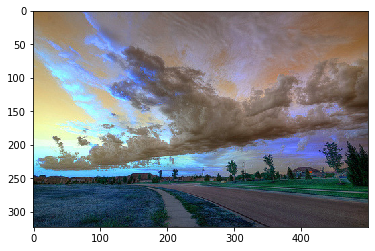

In [3]:

plt.imshow(original_image)

Since , we can see the image is consisiting  more of a blue color set , that is beacuse by default cv2 reads image as BGR .We need to convert BGR to RGB.

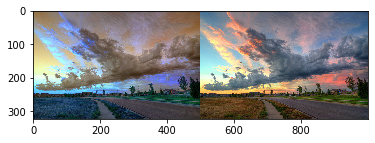

In [4]:
# converting BGR to RGB

RGB_image=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

# getting height,width and depth of our image

h,w,d=RGB_image.shape

#let's see what BGR vs RGB Image looks like
plt.imshow(np.hstack([original_image,RGB_image]))


Now when we have the proper image , we are using MiniBatchKMeans to cluster similar colors together and reducing the number of bytes per pixel used.
MiniBatchKMeans works similar as KMeans clustering , the difference is MiniBatch is faster as it does'nt take account of whole data at a time and rather uses batches of data for faster processing.

In [5]:
#Before applying MiniBatchKMeans , we need to reshape our pixels to (h*w,d).
RGB_image_reshaped=RGB_image.reshape(h*w,3)

In [7]:
#By default quantizing the image with k=8

def quantization(n_clust=8):
    from sklearn.cluster import MiniBatchKMeans
    kmeans=MiniBatchKMeans(n_clusters=n_clust)
    labels=kmeans.fit_predict(RGB_image_reshaped)
    quantized=kmeans.cluster_centers_.astype('uint8')[labels]
    return quantized

In [8]:
quant_image=quantization()
quant_image.shape

(161500, 3)

Reshaping image back to (h,w,d) for plotting it using imshow().

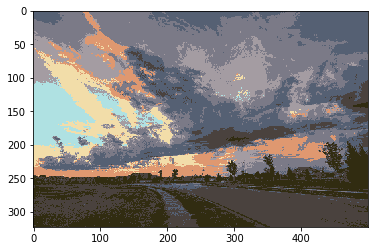

In [9]:
quant_image=quant_image.reshape(h,w,d)
plt.imshow(quant_image)

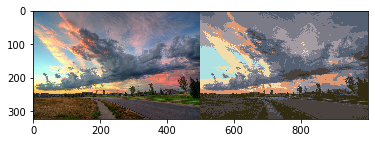

In [10]:
#comparing original image and image after quantization
plt.imshow((np.hstack([RGB_image,quant_image])))

Let us compare how different image looks like when k(no of clusters) is equal to 4,8,16,32 and 64


Image with k= 2


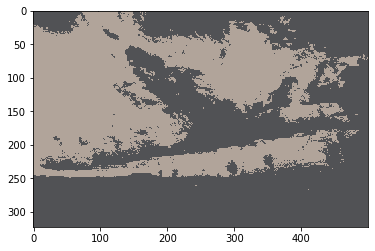



Image with k= 4


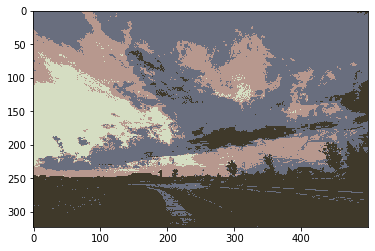



Image with k= 8


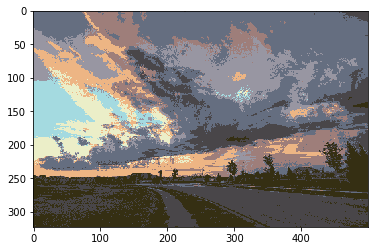



Image with k= 16


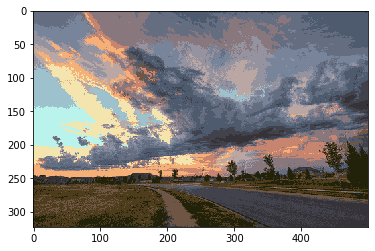



Image with k= 32


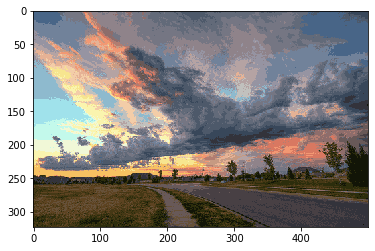



Image with k= 64


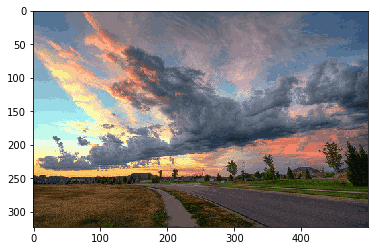

In [11]:
l=[2,4,8,16,32,64]
for i in l:
    quant_image=quantization(n_clust=i)
    print()
    print('Image with k=',i)
    quant_image=quant_image.reshape(h,w,d)
    plt.imshow(quant_image)
    plt.show()
    print()
    
    
    

#  Compression Ratio:

Let us how much we have compressed the image each time with different values of k.


In [14]:
def bits_per_pixel(n):
    c=0
    while (n//2)!=0:
        n=n/2
        c=c+1
    return c

# differnet valuef of k 

k=[2,4,8,16,32,64]



def comp_ratio(k):
    for i in k:
        print("Bits used for k=",i," is equal to :",bits_per_pixel(i))
    print("The compression ratio for all values of k compared to the original k=255 is :")
    
    #k power 3 for depth=3 (RGB value) for k=255 and depth =3 No of bits per pixel=2**24
    k3=[i**3 for i in k]
    
    ans=[(2**(bits_per_pixel(i)))/(2**24) for i in k3]
    
    return ans

#Compression ratio of different values of k and k=255

comp_ratio(k)


Bits used for k= 2  is equal to : 1
Bits used for k= 4  is equal to : 2
Bits used for k= 8  is equal to : 3
Bits used for k= 16  is equal to : 4
Bits used for k= 32  is equal to : 5
Bits used for k= 64  is equal to : 6
The compression ratio for all values of k compared to the original k=255 is :


[4.76837158203125e-07,
 3.814697265625e-06,
 3.0517578125e-05,
 0.000244140625,
 0.001953125,
 0.015625]

So, we saw how the two images differ, now to save the image we need to convert the RGB image back to BGR .

In [16]:
quantized_BGR=cv2.cvtColor(quantized,cv2.COLOR_RGB2BGR)
#plt.imshow(quantized_BGR)

NameError: name 'quantized' is not defined

Saving the image using imwrite().The new image will be saved automatically with the name compressedimage.

In [ ]:
cv2.imwrite('compressedimage.png',quantized_BGR)